#Projeto 3 - Análise de sentimento sobre o mercado financeiro

- Entrega

O projeto deve ser entregue até a terça-feira da 4ª semana de aula, envie o link do GitHub ou HTML na atividade no Moodle.

O prazo máximo é quarta-feira da 4ª semana de aula, valendo 20% a menos da nota.

- Dados do Certificado

Linguagem: Python

Tecnologias: Pandas, Numpy, Spacy, Matplotlib e Sklearn

Carga horária: 20 horas

- Financial Sentiment Analysis

Este conjunto de dados reúne diversos textos sobre o mercado financeiro e categoriza cada texto em positivo, negativo e neutro.

##Sobre este projeto
Os principais pontos que serão avaliados:
- Extração de dados
- Manipulação de dados e criação de gráficos simples com o Pandas
- Criar um modelo de predição
- Apresentação dos resultados

##Preparação do ambiente
- Para este projeto, acessem o link do dataset e logo abaixo cliquem em "Download". Caso você não tenha uma conta no Kaggle, crie uma e retorne para esse ponto para realizar o download. Descompacte o arquivo.
- Este conjunto de dados está em inglês, use o Spacy e os demais dados auxiliares em inglês.
- Caso demore demais para executar ou que ocorra estouro de memória, use somente 40% dos dados.

#Exercícios

## Exercício 1  
Construa as funções e a pipeline, separe os dados em treino e teste, execute a pipeline para classificar em positivo, negativo e neutro. Quais foram os valores de acurácia, precisão e sensitividade deste modelo? (3.0 pontos)

In [ ]:
import numpy as np
import pandas as pd

import spacy

import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.base import TransformerMixin 
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import lightgbm as lgb

In [ ]:
df = pd.read_csv('/content/data.csv')
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


Aqui podemos ver quantas linhas tem a nossa base dados:

In [ ]:
df.shape

(5842, 2)

Podemos ver também que tipo de dados estamos trabalhando, no caso são textos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


Agora vamos criar as funções que usaremos para criar uma pipeline

In [ ]:
nlp = spacy.load('en_core_web_sm')

Criamos uma classe para gerenciar X e y

In [ ]:
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}

Esta funcao remove espacos em branco no inicio e no fim do texto e converte todo o texto em letras minusculas

In [ ]:
def clean_text(texto):     
    return texto.strip().lower()

Esta funcao remove todas as stopwords e pontuações

In [ ]:
def tokenizer(texto):
    doc = nlp(texto)
    tokens = [token for token in doc if ((not token.is_stop) & (not token.is_punct))]
    tokens = [token.lemma_.lower().strip() for token in tokens]
    return tokens

Criamos um objeto CountVectorizer para vetorizar cada texto

In [ ]:
vectorizer = CountVectorizer(tokenizer = tokenizer, ngram_range=(1,1)) 

Criamos um modelo SVM, este será o nosso modelo referência, a partir deste iremos testar outros modelos e comparar

In [ ]:
classifier = SVC()

Separando em X e y

In [ ]:
X = df.Sentence
y = df.Sentiment

Separando em teste e treino

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


Construindo uma pipeline

In [ ]:
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', vectorizer),
                 ('classifier', classifier)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

Agora iremos ver as métricas resultantes

In [ ]:
print('Accuracy Score:',round(accuracy_score(y_test, y_pred), 3))
print('Precision Score:',round(precision_score(y_test, y_pred, average='macro'), 3))
print('Recall Score',round(recall_score(y_test, y_pred, average='macro'), 3))

Accuracy Score: 0.678
Precision Score: 0.57
Recall Score 0.52


Agora vamos criar uma função para testar mais modelos, no caso vamos testar SVM,KNN,Random_Forest,Reg_Logistica,ADA,MNB,BNB

In [ ]:
metricas = pd.DataFrame({'Métricas':['Accuracy Score:','Precision Score:','Recall Score:']})
def modelos_testes(classifier,modelo): 
  pipe = Pipeline([("cleaner", predictors()),
                  ('vectorizer', vectorizer),
                  ('classifier', classifier)])

  pipe.fit(X_train,y_train)
  y_pred = pipe.predict(X_test)
  metricas[modelo] = [round(accuracy_score(y_test, y_pred), 3),round(precision_score(y_test, y_pred, average='macro'), 3),round(recall_score(y_test, y_pred, average='macro'), 3)]
  metricas

In [ ]:
SVM = (SVC(),'SVM')
KNN = (KNeighborsClassifier(),'KNN')
Random_Forest = (RandomForestClassifier(),'Random Forest')
Reg_Logistica = (LogisticRegression(),'Reg Logistica')
ADA = (AdaBoostClassifier(),'ADA')
MNB = (MultinomialNB(),'MNB')
BNB = (BernoulliNB(),'BNB')

Aqui então chamaremos a função para rodar todos os medelos escolhidos

In [ ]:
for i,j in (SVM,KNN,Random_Forest,Reg_Logistica,ADA,MNB,BNB):
  modelos_testes(i,j)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
metricas

,Métricas,SVM,KNN,Random Forest,Reg Logistica,ADA,MNB,BNB
0,Accuracy Score:,0.678,0.603,0.665,0.655,0.688,0.667,0.660
1,Precision Score:,0.570,0.553,0.554,0.556,0.640,0.580,0.538
2,Recall Score:,0.520,0.445,0.540,0.549,0.581,0.567,0.497


Como podemos ver na tabela das métricas, o melhor modelo ficou o ADA Boost Classifier, então usaremos esta pra os próximos exercícios do projeto.

In [ ]:
modelos_testes(AdaBoostClassifier(),'ADA')

In [ ]:
melhor_modelo = metricas.loc[:,["Métricas",'ADA']]

In [ ]:
melhor_modelo

,Métricas,ADA
0,Accuracy Score:,0.688
1,Precision Score:,0.640
2,Recall Score:,0.581


##Excercício 2
Use o seu modelo para classificar os seguintes textos extraídos do site Financial Times. Faça uma tabela com o valor esperado e o valor obtido, e responda: 
- houve divergência entre o esperado e o obtido? 
- O que poderia ser feito para corrigir? (1.0 ponto)


- a. Central banks’ rate rises, geopolitical risk and slowing growth trigger investors’ stampede for safety. resultado esperado: [negativo]
- b. China opens up bond market in bid to woo foreign investors. resultado esperado: [neutro]
- c. HM Revenue & Customs says residents had £850bn in accounts overseas but it does not estimate if tax paid on this. resultado esperado: [negativo]
- d. Japan’s horrifying crop of data falsification is also encouraging. The scandals have emerged from a distinct new phase in the evolution of the country’s shareholder capitalism. resultado esperado: [negativo]
- e. Despite internal problems, the group continues to exert a tight grip on the US’s gun control debate. resultado esperado: [neutro]

In [ ]:
a = 'Central banks’ rate rises, geopolitical risk and slowing growth trigger investors’ stampede for safety.'
a_sent = 'negative'
b = 'China opens up bond market in bid to woo foreign investors.'
b_sent = 'neutral'
c = 'HM Revenue & Customs says residents had £850bn in accounts overseas but it does not estimate if tax paid on this.'
c_sent = 'negative'
d = 'Japan’s horrifying crop of data falsification is also encouraging. The scandals have emerged from a distinct new phase in the evolution of the country’s shareholder capitalism.'
d_sent = 'negative'
e = 'Despite internal problems, the group continues to exert a tight grip on the US’s gun control debate.'
e_sent = 'neutral'

Criamos uma variável com os textos extraídos do site Financial Times.

In [ ]:
texto_ex2 = [a,b,c,d,e]
texto_ex2

['Central banks’ rate rises, geopolitical risk and slowing growth trigger investors’ stampede for safety.',
 'China opens up bond market in bid to woo foreign investors.',
 'HM Revenue & Customs says residents had £850bn in accounts overseas but it does not estimate if tax paid on this.',
 'Japan’s horrifying crop of data falsification is also encouraging. The scandals have emerged from a distinct new phase in the evolution of the country’s shareholder capitalism.',
 'Despite internal problems, the group continues to exert a tight grip on the US’s gun control debate.']

Aqui criamos uma variável com os valores dos textos extraídos do site Financial Times.

In [ ]:
sentimento_ex2 = [a_sent,b_sent,c_sent,d_sent,e_sent]
sentimento_ex2

['negative', 'neutral', 'negative', 'negative', 'neutral']

Vamos olhar os sentimentos que o modelo obteve

In [ ]:
y_pred_ex2 = pipe.predict(texto_ex2)
y_pred_ex2

array(['positive', 'neutral', 'neutral', 'neutral', 'neutral'],
      dtype=object)

Agora poderemos comparar os sentimentos obtidos com os valores esperados

In [ ]:
tabela_resultado = pd.DataFrame({'Valor Esperado':sentimento_ex2,'Valor Obtido':y_pred_ex2})
tabela_resultado

,Valor Esperado,Valor Obtido
0,negative,positive
1,neutral,neutral
2,negative,neutral
3,negative,neutral
4,neutral,neutral


In [ ]:
print('Accuracy Score:',round(accuracy_score(sentimento_ex2, y_pred_ex2), 3))
print('Precision Score:',round(precision_score(sentimento_ex2, y_pred_ex2, average='macro'), 3))
print('Recall Score',round(recall_score(sentimento_ex2, y_pred_ex2, average='macro'),3))

Accuracy Score: 0.4
Precision Score: 0.167
Recall Score 0.333


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- houve divergência entre o esperado e o obtido? 

Houve bastante divergência entre os valores, enquanto nosso modelo tendenciou para ser mais positivo/neutros, os valores esperados eram bastante negativos/neutros. A principal diferença entra no primeiro texto, onde o esperado era um sentimentos negativo e no obetivo resultou em positivo. 

As métricas foram:
- Accuracy Score: 0.4
- Precision Score: 0.167
- Recall Score 0.333


- O que poderia ser feito para corrigir?

A primeira etapa acredito que deveria ser tratar estes textos extraídos do site Financial Times como foram tratados os textos do nosso dataset inicial, assim poderiamos comparar os textos tratados da mesma maneira. Outro ponto importante seria adaptar o nosso modelo para determinado segmento, criar stopwords próprios, melhorar a nossa lemarização, entre outros tratamentos que poderiamos olhar com mais calma.


##Exercício 3
Faça uma análise exploratória, onde identifique as três empresas mais citadas e quantifique os níveis de positividade, negatividade e neutralidade dos textos sobre estas empresas. (3.0 pontos)
 - a. Extraia de todos os textos as entidades, há quantas entidades? (0.6 pontos) 
 - b. Quantas entidades são empresas? (0.6 pontos) 
 - c. Quais são as três empresas mais citadas? (0.6 pontos) 
 - d. Faça uma tabela onde demonstre as três empresas mais citadas e o total de textos positivos, negativos e neutros de cada uma. (1.2 pontos)

In [ ]:
df.shape

(5842, 2)

Aqui vamos gerar um variável para ver as posições das palavras nas frases

In [ ]:
tokenlist=[]
for i in range(len(df)):
  texto_01 = df['Sentence'][i].replace(","," ").replace(";"," ").lower()
  for token in nlp(texto_01):
    tokenlist.append([token.text, token.pos_])
    # print(token.text, token.pos_)

In [ ]:
tokenlist = pd.DataFrame(tokenlist)

In [ ]:
tokenlist.head()

,0,1
0,the,DET
1,geosolutions,NOUN
2,technology,NOUN
3,will,VERB
4,leverage,VERB


Aqui criaremos outra variável para ver quais entidades foram classificadas e como foram classificadas, ainda na mesma tabela iremos incluir o sentimento da frase no qual a entidade pertence.

In [ ]:
entidades=[]
for i in range(len(df)):
  texto_01 = df['Sentence'][i].replace(","," ").replace(";"," ").lower()
  for ent in nlp(texto_01).ents:
    entidades.append((ent.text, ent.label_,df["Sentiment"][i]))


In [ ]:
entidades = pd.DataFrame(data = entidades, columns=['Entidades','Label','Sentimento'])

In [ ]:
entidades.shape

(13641, 3)

In [ ]:
entidades.head()

,Entidades,Label,Sentimento
0,esi,PERSON,negative
1,1.50,MONEY,negative
2,2.50,MONEY,negative
3,the last quarter of 2010,DATE,positive
4,the same period a year earlier,DATE,positive


In [ ]:
entidades['Entidades'].value_counts()

finnish             389
finland             277
eur                 233
today               194
2009                165
                   ... 
winter                1
christian             1
philip morris         1
19 december 2008      1
strips ltd.           1
Name: Entidades, Length: 6195, dtype: int64

In [ ]:
entidades['Label'].value_counts()

DATE           3199
ORG            2212
CARDINAL       1920
GPE            1640
PERSON         1300
MONEY          1047
PERCENT         744
NORP            697
QUANTITY        387
LOC             146
ORDINAL         102
TIME             84
PRODUCT          73
FAC              56
WORK_OF_ART      17
LAW               8
LANGUAGE          7
EVENT             2
Name: Label, dtype: int64

In [ ]:
entidades['Label'].value_counts().shape

(18,)

**a. Extraia de todos os textos as entidades, há quantas entidades?**

R: Tivemos ao total 13641 entidades com repetições, sem repetições tivemos 6195 e tivemos 18 tipos de classificações(labels) encontrados nesses textos.

In [ ]:
entidades['Label'].value_counts()

DATE           3199
ORG            2212
CARDINAL       1920
GPE            1640
PERSON         1300
MONEY          1047
PERCENT         744
NORP            697
QUANTITY        387
LOC             146
ORDINAL         102
TIME             84
PRODUCT          73
FAC              56
WORK_OF_ART      17
LAW               8
LANGUAGE          7
EVENT             2
Name: Label, dtype: int64

In [ ]:
entidades['Label'].value_counts()['ORG']

2212

In [ ]:
entidades[entidades['Label']=='ORG']['Entidades'].value_counts().shape

(1255,)

**b. Quantas entidades são empresas? (0.6 pontos)**

R: tivemos 2212 entidades classificadas como "ORG", empresas. Porém se olhar a quantidade de entidades sem repetição chegamos ao número de 1255 empresas.

In [ ]:
entidades[entidades['Label']=='ORG']['Entidades'].value_counts()

oyj                        66
eur                        50
nokia                      47
pct                        41
tesco                      29
                           ..
cramo plc                   1
citrix systems inc          1
https://t.co/v7lkq08flp     1
oy telpak ab                1
strips ltd.                 1
Name: Entidades, Length: 1255, dtype: int64

In [ ]:
entidades[entidades['Entidades']=='eur']['Label'].value_counts()

GPE    183
ORG     50
Name: Label, dtype: int64

**c. Quais são as três empresas mais citadas? (0.6 pontos)**

R: As 3 empresas mais citadas foram OYJ, EUR e NOKIA, com 66, 50 e 47 citações cda uma.

In [ ]:
empresas = entidades.query('Label == "ORG" and Entidades in ["oyj", "eur", "nokia"]')

In [ ]:
empresas

,Entidades,Label,Sentimento
159,eur,ORG,neutral
162,eur,ORG,neutral
166,eur,ORG,neutral
174,oyj,ORG,neutral
367,nokia,ORG,neutral
...,...,...,...
13173,oyj,ORG,neutral
13312,eur,ORG,neutral
13333,nokia,ORG,neutral
13360,oyj,ORG,neutral


**d. Faça uma tabela onde demonstre as três empresas mais citadas e o total de textos positivos, negativos e neutros de cada uma. (1.2 pontos)**

In [ ]:
tabela_resultado = pd.crosstab(empresas.Entidades, empresas.Sentimento)
tabela_resultado

Sentimento,negative,neutral,positive
Entidades,,,
eur,9,24,17
nokia,3,30,14
oyj,12,34,20


##Exercício 4
Faça gráficos a partir da tabela obtida acima. 

Descreva cada gráfico de forma que estivesse apresentando à diretoria dessas três empresas. (3.0 pontos)

Primeiramente vou apresentar uma visão geral do do nosso projeto, olhando para as 3 empresas selecionadas quais os sentimentos de cada uma. 

Importante ressaltar que as empresas que eu peguei foram as empresas que a biblioteca classificou como "ORG", talvez fosse necessário fazer uma varredura melhor nesses textos, aprimorar a leitura das entidades "ORG", mas isso é bem complexo e será feito em outras etapas, aqui vou focar nos resultados já obtidos.

Para uma melhor compreensão nesse primeiro momento, onde olharemos todas as empresas juntas para cada sentimento, vamos utilizar os números em porcentagem, assim ficará melhor de comparar as 3 empresas.

Caso usássemos os valores brutos não teríamos a real dimensão do resultado, pois o valor total de cada uma é diferente, dessa maneira, em porcentagem, podemos ver qual performou melhor em cada caso.

In [ ]:
tabela_percent = pd.crosstab(empresas.Entidades, empresas.Sentimento,normalize='index')
tabela_percent

Sentimento,negative,neutral,positive
Entidades,,,
eur,0.180000,0.480000,0.340000
nokia,0.063830,0.638298,0.297872
oyj,0.181818,0.515152,0.303030


Vamos começar olhando 2 tipos gráficos baseados na tabela do exercício 3, nos prímeros vamos comparar como cada empresa se comportou em cada sentimento, no segundo como cada sentimento se comportou em cada empresa.

Text(0.5, 1.0, 'SENTIMENTO POSITIVO (%)')

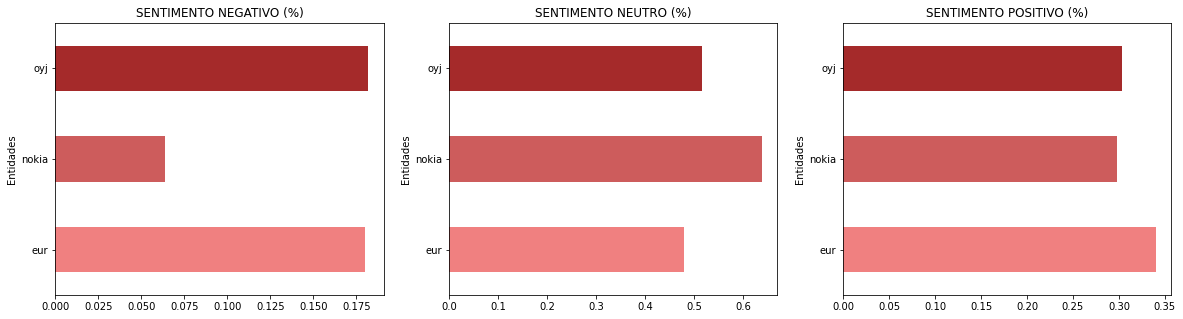

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1) 
tabela_percent['negative'].plot.barh(color=["lightcoral","indianred","brown"])
plt.title('Sentimento Negativo (%)'.upper(), fontsize=12) 

plt.subplot(1, 3, 2) 
tabela_percent['neutral'].plot.barh(color=["lightcoral","indianred","brown"])
plt.title('Sentimento Neutro (%)'.upper(), fontsize=12) 

plt.subplot(1, 3, 3) 
tabela_percent['positive'].plot.barh(color=["lightcoral","indianred","brown"])
plt.title('Sentimento Positivo (%)'.upper(), fontsize=12) 

Neste gráfico divimos em 3 sentimentos:
- Negativo, quando o nome da empresa está em uma frase que foi classificada negativamente, isso quer dizer que pode ser alguma crítica ruim para a empresa.
- Neutro, quando o nome da empresa esta associada a alguma mensagem neutra, nem positivamente, nem negativamente, algum comentário sobre algum produto ou serviço.
- Positivo, quando o nome da empresa foi citada em algum elogio, falando bem de algo que a empresa fez, algo que pode agregar para a empresa, pode aumentar a credibilidade em relação aos seus clientes. 

Então, depois ver o que cada sentimento significa podemos analisar os dados obtidos. Como podemos ver a empresa NOKIA foi em disparado a empresa que menos teve incidência em relação aos comentários negativos, enquanto as outras duas ficaram bem parecidas percentualmente. Em um resumo, a empresa NOKIA foi a que se saiu melhor nessa nossa primeira análise.

Agora vamos olhar cada empresa separadamente, em número brutos.

In [ ]:
graficos = pd.crosstab(empresas.Sentimento,empresas.Entidades)
graficos

Entidades,eur,nokia,oyj
Sentimento,,,
negative,9,3,12
neutral,24,30,34
positive,17,14,20


Para fazer uma apresentação dos dados obtidos por cada empresa, utilizamos o gráfico de barras na horizontal. Em verde escuro podemos ver a quantidade de comentários positivos que tem envolvida a empresa, em verde um pouco mais claro os comentários neutros e em verde claro os comentários negativos.

Estes são indicativos que podemos usar para entender como os nosso clientes estão vendo os nossos serviços e nossos produtos, como todos sabem é muito comum os clientes procurarem por feedbacks em sites de busca para saber se podemos confiar em uma empresa ou não, então aqui podemos ver estes números para saber como melhorar a nosso performance.

**Começaremos com a empresa EUR:**

Text(0.5, 1.0, 'EMPRESA EUR')

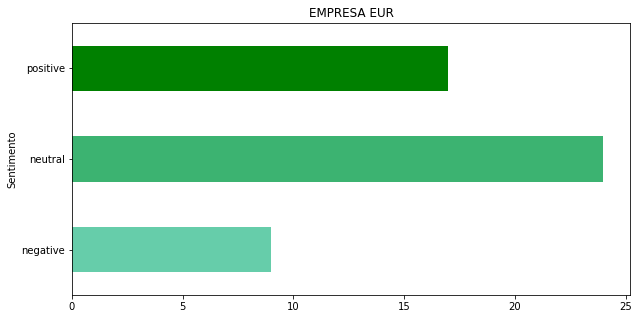

In [ ]:
plt.figure(figsize=(10,5))
graficos['eur'].plot.barh(color=["mediumaquamarine","mediumseagreen","g"])
plt.title('Empresa EUR'.upper(), fontsize=12) 

A empresa 'EUR' teve um número bastante significativos de comentários ruins, que chamaremos de reclamações. Iremos considerar que precisamos olhar comentário por comentário, procurar quais as causas para estes comentário e a partir disso procurar por soluções. O objetivo é buscar sempre zerar os comentários negativos, porém sabemos que isso é praticamente impossível, sempre haverá descuidos, mas temos que trabalhar para minimizar esses erros ao máximo.

Text(0.5, 1.0, 'EMPRESA NOKIA')

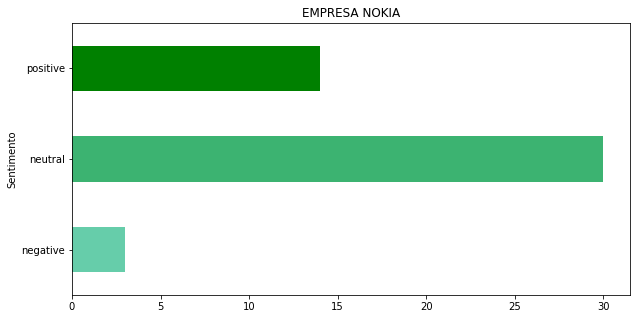

In [ ]:
plt.figure(figsize=(10,5))
graficos['nokia'].plot.barh(color=["mediumaquamarine","mediumseagreen","g"])
plt.title('Empresa NOKIA'.upper(), fontsize=12) 

A empresa 'NOKIA' teve uma performance muito boa, chegando a apenas 3 comentários negativos em suas críticas. Porém mesmo assim, os comentários negativos sempre devem ser trabalhados, nesse caso podemos ver quais seriam estas reclamações, entender se os problemas já são recorrentes ou são casos específicos, se forem casos recorrentes podemos tentar entender o porque não foram solucionados anteriormente, quais as ações tomadas, entender se foram efetivas e tentar atacar elas novamente. Se forem casos específico é importante mapear, entender se podem acontecer novamente, e manter um acompanhamento mais de perto. 

Aqui neste caso tivemos muitos comentários neutros, como foram muitas incidências poderíamos pegar uma amostra, olhar cada um deles separados, entender o que faltou para serem positivos, e se possível trabalhar para melhora-los nas próximas críticas. 

Text(0.5, 1.0, 'EMPRESA OYJ')

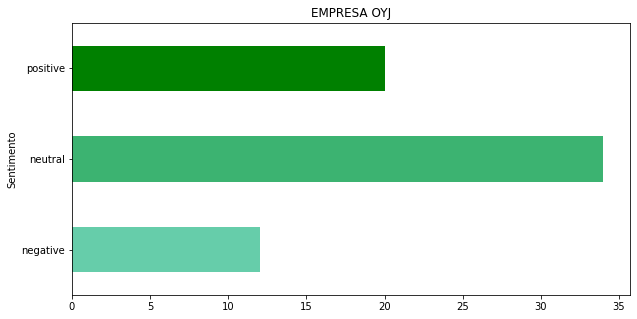

In [ ]:
plt.figure(figsize=(10,5))
graficos['oyj'].plot.barh(color=["mediumaquamarine","mediumseagreen","g"])
plt.title('Empresa OYJ'.upper(), fontsize=12) 

A empresa 'OYJ' teve um número bastante significativos de comentários ruins, que chamaremos de reclamações. Iremos considerar que precisamos olhar comentário por comentário, procurar quais as causas para estes comentário e a partir disso procurar por soluções. 

Entender se estas reclamações já ocorreram anteriormente, procurar entender se já foram tomadas ações em cima destas, se não, fazer um mapeamento completo do porque estão ocorrendo. Estas são as principais medidas que podem ser tomadas neste momento, quando conseguirmos diminuir os comentário negativos, podemos começar a atacar os comentários neutros.

#Conclusão

Desta maneira chegamos ao fim do nosso projeto, entendemos que precisamos de melhorias, este é o primeiro caso estudado, com mais experiência, ajuda de especialistas, poderemos aumentar ainda mais o nosso nível de precisão. O objetivo é sempre melhorar nossas análises, não podemos nos conter com o básico, buscar melhorias contínuas, assim os erros irão diminuir ao máximo.